# 2.8 Singular Value Decomposition

$ A = UDV $    
U, V: 左、右奇异向量组成的酉矩阵    
D: 对角矩阵

In [1]:
run utils.ipynb

<IPython.core.display.Javascript object>

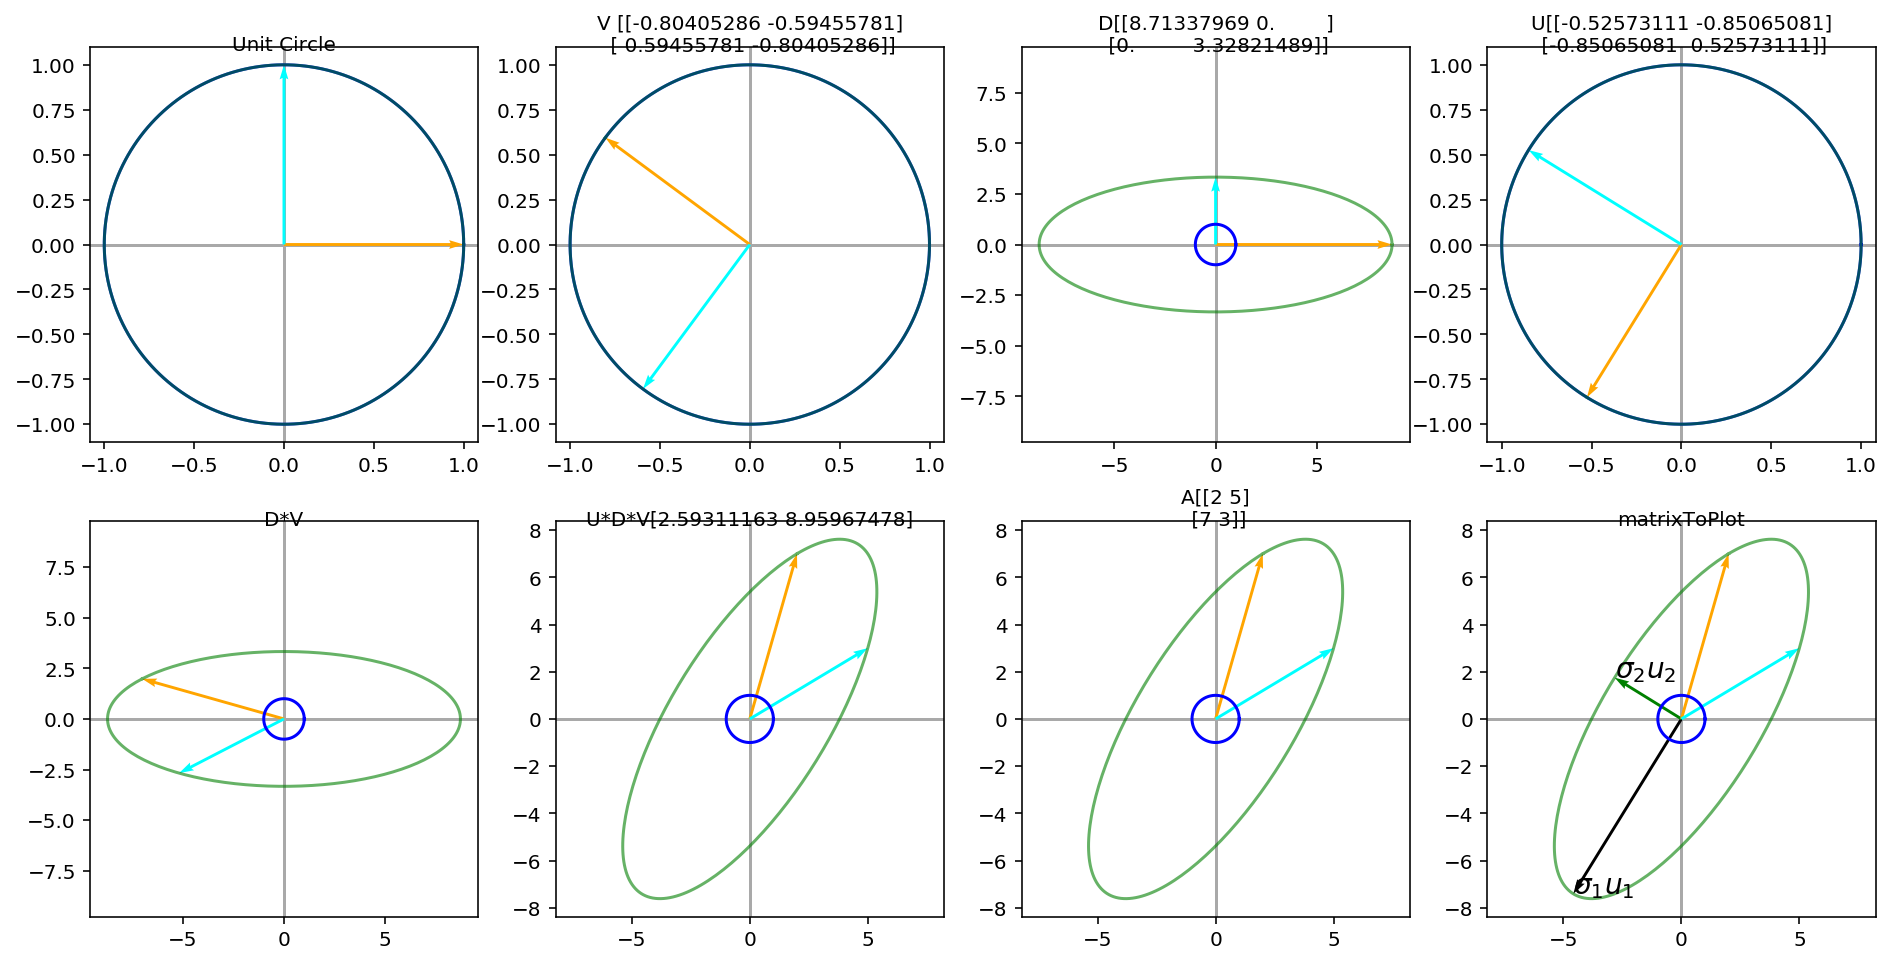

In [2]:
A = np.array([[2,5], [7,3]])
U, D, V = np.linalg.svd(A)
D_diag = np.diag(D)

fig, ax = plt.subplots(2,4, figsize=(16,8))
unit_circle = np.array([[1, 0], [0, 1]])
matrixToPlot(unit_circle, ax=ax[0][0], title='Unit Circle')  # 单位圆
matrixToPlot(V, ax=ax[0][1], title='V %s' %V)  # 右奇异向量组成的矩阵V*单位圆
matrixToPlot(D_diag, ax=ax[0][2], title='D%s' %D_diag)  # # 对角矩阵D*单位圆
matrixToPlot(U, ax=ax[0][3], title='U%s' %U)  # 左奇异向量组成的矩阵U*单位圆

matrixToPlot(D_diag.dot(V), ax=ax[1][0], title='D*V') # D*V
matrixToPlot(U.dot(D_diag).dot(V), ax=ax[1][1], title='U*D*V%s' %U.dot(D).dot(V)) # U*D*V
matrixToPlot(A.dot(unit_circle), ax=ax[1][2], title='A%s' %A) # A

# Principle Components
u1 = [D[0]*U[0,0], D[0]*U[0,1]]
v1 = [D[1]*U[1,0], D[1]*U[1,1]]
plotVectors([u1, v1], cols=['k', 'g'], ax=ax[1][3])
matrixToPlot(A, ax=ax[1][3])
plt.text(u1[0], u1[1], r"$\sigma_1u_1$", size=14)
plt.text(v1[0], v1[1], r"$\sigma_2u_2$", size=14)

[ax[i][j].axis('equal') for i in range(2) for j in range(4)];

They are the major ($\sigma_1u_1$) and minor ($\sigma_2u_2$) axes of the elipse. We can see that the feature corresponding to this major axis is associated with more variance (the range of value on this axis is bigger than the other). See [2.12](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.12-Example-Principal-Components-Analysis/) for more details about the variance explained.

## The left-singular vectors
The left-singular vectors of ${A}$ correspond to the eigenvectors of ${AA}^\text{T}$.

$ U $: Eigenvectors of $ AA^T $

In [3]:
np.linalg.eig(A.dot(A.T))[1]

array([[-0.85065081, -0.52573111],
       [ 0.52573111, -0.85065081]])

## The right-singular vectors
$ V $: Eigenvectors of $ A^TA $

In [4]:
np.linalg.eig(A.dot(A.T))[1]

array([[-0.85065081, -0.52573111],
       [ 0.52573111, -0.85065081]])

The square roots of the eigenvalues of $ 𝐴^T𝐴 $ and $ 𝐴𝐴^T $

In [5]:
np.sqrt(np.linalg.eig(A.T.dot(A))[0])

array([8.71337969, 3.32821489])

# Apply the SVD on images

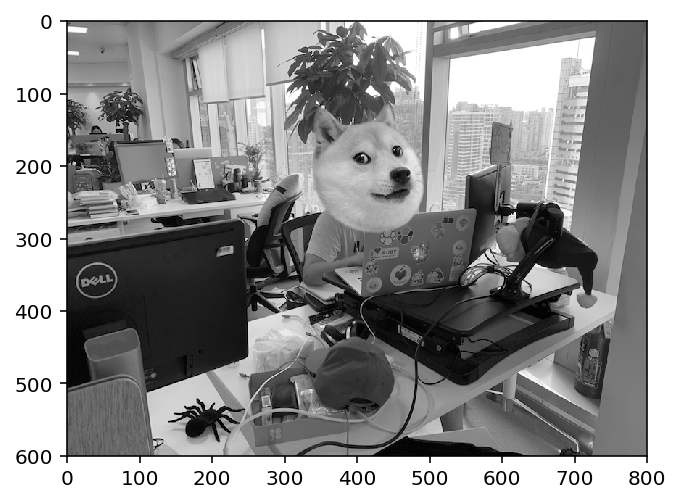

In [6]:
import cv2
img = cv2.cvtColor(cv2.imread('images/fellow.jpg'), cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray');

In [7]:
U, D, V = np.linalg.svd(img)

In [8]:
V.shape

(800, 800)

In [9]:
U[:, :2].shape

(600, 2)

In [10]:
np.matrix(U[:, :2]).shape

(600, 2)

In [11]:
@interact(
    svd = widgets.IntText(value=2)
)
def reconstruct(svd):
    u = U[:, :svd]
    d = np.diag(D[:svd])
    v = V[:svd, :]
    reconst_img = u.dot(d).dot(v)
    plt.imshow(reconst_img, cmap='gray')
    plt.show()
    print('size ratio %.2f' %((u.size + d.size + v.size) / img.size *100) + '%')

interactive(children=(IntText(value=2, description='svd'), Output()), _dom_classes=('widget-interact',))